### EDA CSV EndInvFINAL12312016

In [25]:
# Importar Librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [26]:
#Cargar el dataset
df_InventarioFinal = pd.read_csv("Dataset/EndInvFINAL12312016.csv")
df_InventarioFinal.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2016-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2016-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2016-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2016-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2016-12-31


In [27]:
# Obtener información general del dataset
df_InventarioFinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224489 entries, 0 to 224488
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InventoryId  224489 non-null  object 
 1   Store        224489 non-null  int64  
 2   City         223205 non-null  object 
 3   Brand        224489 non-null  int64  
 4   Description  224489 non-null  object 
 5   Size         224489 non-null  object 
 6   onHand       224489 non-null  int64  
 7   Price        224489 non-null  float64
 8   endDate      224489 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 15.4+ MB


In [28]:
# Descripción estadística básica
df_InventarioFinal.describe()

,Store,Brand,onHand,Price
count,224489.000000,224489.000000,224489.000000,224489.000000
mean,43.505740,14356.370513,21.763988,23.585583
std,23.326415,13118.467851,37.233576,79.202775
min,1.000000,58.000000,0.000000,0.490000
25%,23.000000,3798.000000,7.000000,9.990000
50%,44.000000,8259.000000,12.000000,14.990000
75%,66.000000,23965.000000,22.000000,23.490000
max,81.000000,90631.000000,3676.000000,13999.900000


In [29]:
# Verificación de valores nulos
df_InventarioFinal.isnull().sum()

InventoryId       0
Store             0
City           1284
Brand             0
Description       0
Size              0
onHand            0
Price             0
endDate           0
dtype: int64

In [30]:
# Verificar la cantidad de nulos en la columna 'City'
print("Nulos en 'City' antes de la actualización:", df_InventarioFinal['City'].isnull().sum())

# Extraer la ciudad de 'InventoryId' y llenar los nulos en 'City'
df_InventarioFinal.loc[df_InventarioFinal['City'].isnull(), 'City'] = (
    df_InventarioFinal['InventoryId'].str.split('_').str[1]
)

# Verificar la cantidad de nulos en la columna 'City' después de la actualización
print("Nulos en 'City' después de la actualización:", df_InventarioFinal['City'].isnull().sum())


Nulos en 'City' antes de la actualización: 1284
Nulos en 'City' después de la actualización: 0


In [31]:
# Verificar si hay filas duplicadas
duplicated_rows = df_InventarioFinal.duplicated()

# Contar el número de filas duplicadas
num_duplicated_rows = duplicated_rows.sum()

# Mostrar el número de filas duplicadas
print(f'Número de filas duplicadas: {num_duplicated_rows}')

# Opcional: Mostrar las filas duplicadas
if num_duplicated_rows > 0:
    print(df_InventarioFinal[duplicated_rows])

Número de filas duplicadas: 0


In [32]:
#Se verifica el tipo de dato de cada columna
print(df_InventarioFinal.dtypes)

InventoryId     object
Store            int64
City            object
Brand            int64
Description     object
Size            object
onHand           int64
Price          float64
endDate         object
dtype: object


In [33]:
#  Convertir las fechas a formato datetime para análisis de fechas
df_InventarioFinal['endDate'] = pd.to_datetime(df_InventarioFinal['endDate'])

#### La columna endDate es 100% la fecha 2016-12-31

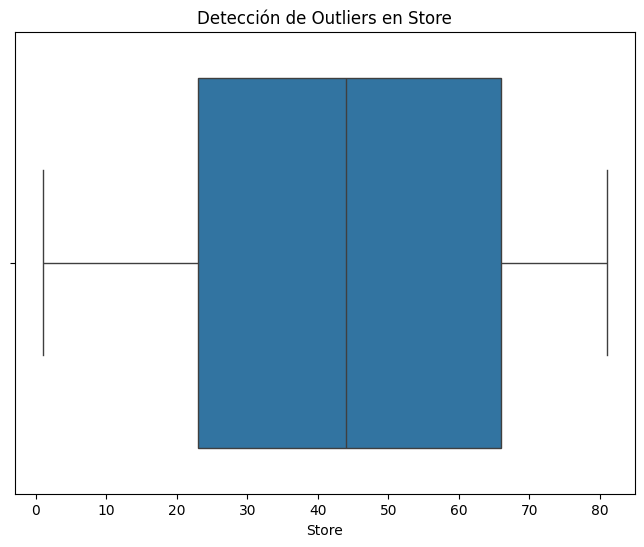

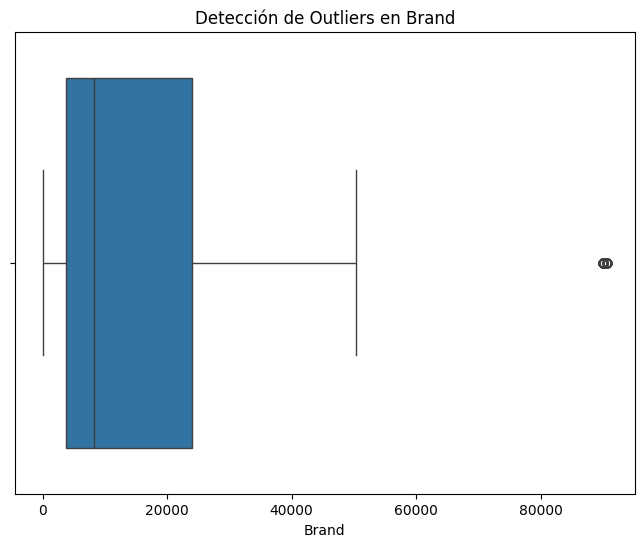

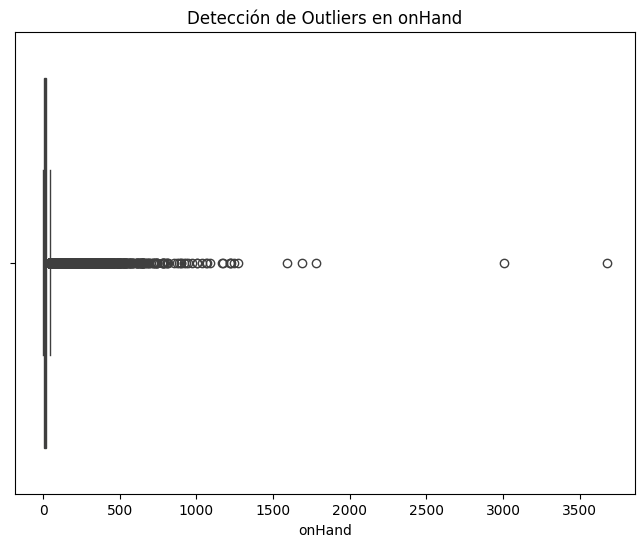

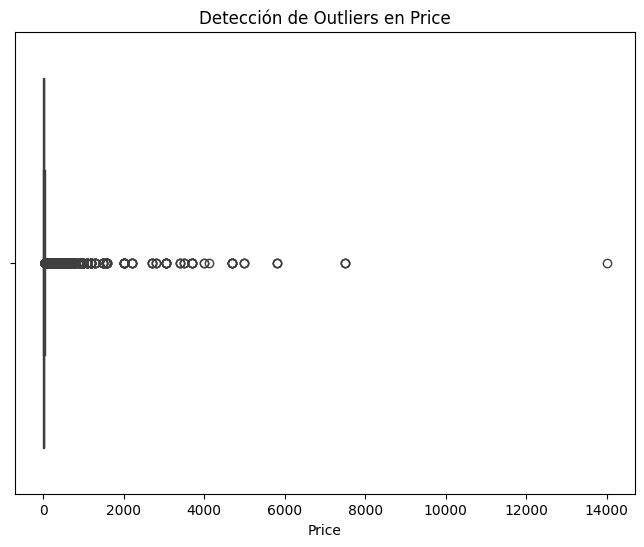

In [34]:
# Detección de outliers columnas (ajusta el nombre de la columna según el dataset)
# Filtrar las columnas numéricas del DataFrame
columnas_numericas = df_InventarioFinal.select_dtypes(include=['float64', 'int64']).columns

# Iterar sobre las columnas numéricas
for columna in columnas_numericas:
    plt.figure(figsize=(8,6))
    sns.boxplot(x=df_InventarioFinal[columna])
    plt.title(f'Detección de Outliers en {columna}')
    plt.show()

In [35]:
# Función para detectar y mostrar outliers de una columna
def detectar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)  # Primer cuartil (25%)
    Q3 = df[columna].quantile(0.75)  # Tercer cuartil (75%)
    IQR = Q3 - Q1  # Rango Intercuartílico

    # Definir los límites inferior y superior
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Filtrar las filas que están fuera de los límites (outliers)
    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
    
    return outliers

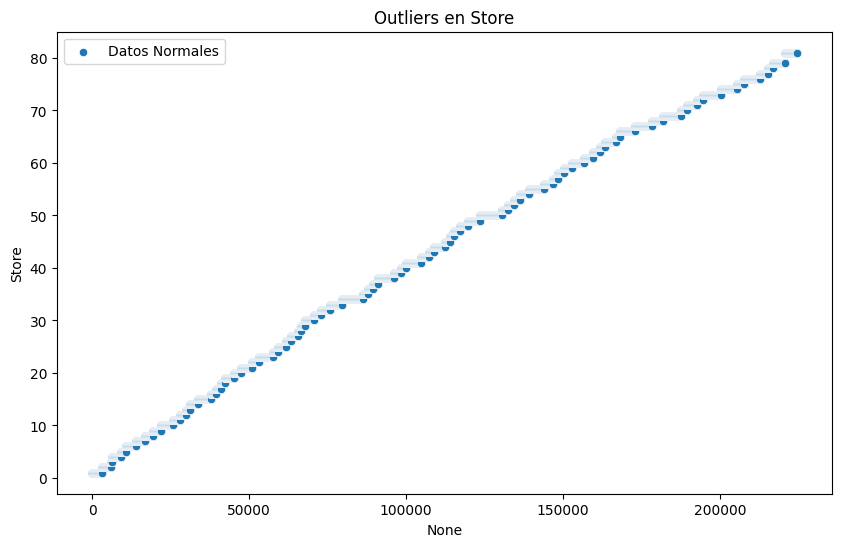

C:\Users\danip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


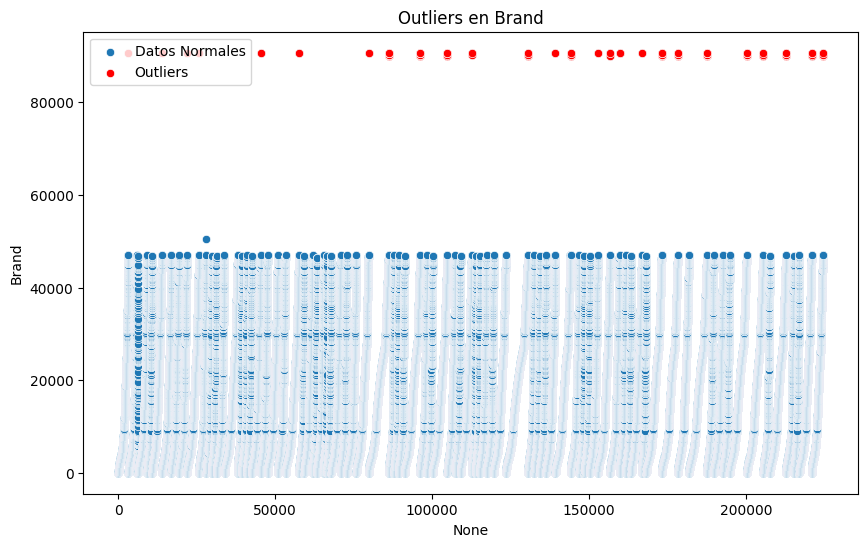

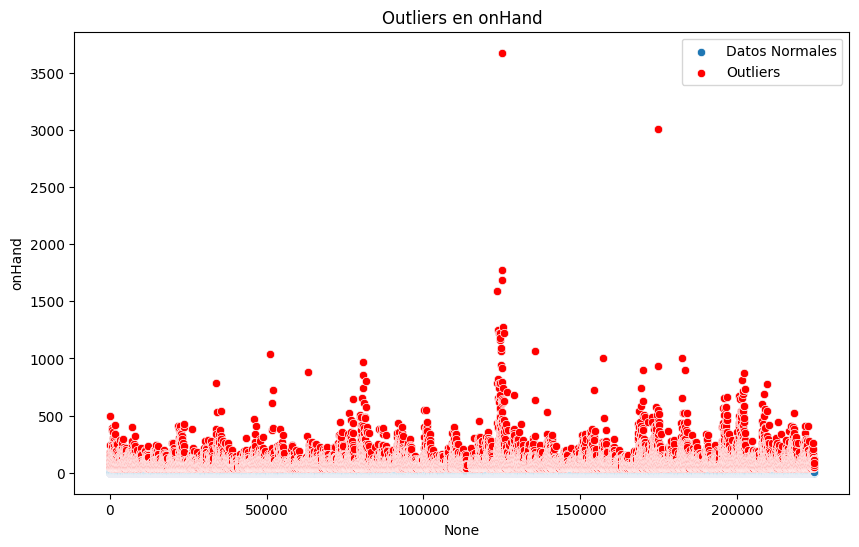

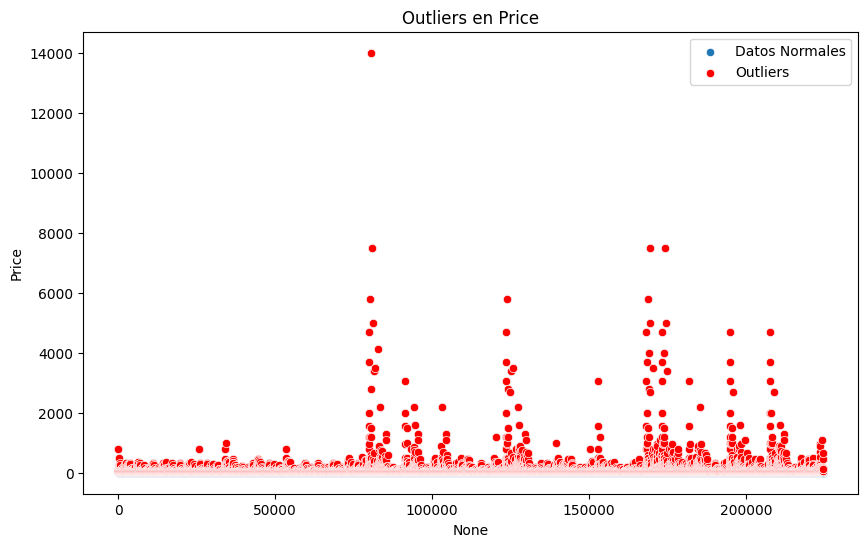

In [36]:
# Gráfico para mostrar outliers junto con datos normales
columnas_a_verificar = df_InventarioFinal.select_dtypes(include=['float64', 'int64']).columns

for columna in columnas_a_verificar:
    plt.figure(figsize=(10,6))
    
    # Graficar los puntos de la columna
    sns.scatterplot(x=df_InventarioFinal.index, y=df_InventarioFinal[columna], label='Datos Normales')

    # Graficar los puntos de los outliers
    outliers = detectar_outliers(df_InventarioFinal, columna)
    sns.scatterplot(x=outliers.index, y=outliers[columna], color='red', label='Outliers')
    
    plt.title(f'Outliers en {columna}')
    plt.legend()
    plt.show()

In [37]:
# Verificar si hay valores negativos en las columnas numéricas
negatives = df_InventarioFinal.select_dtypes(include=['number']) < 0

# Obtener los nombres de las columnas que tienen valores negativos
negative_columns = negatives.any()

# Filtrar las columnas que tienen al menos un valor negativo
columns_with_negatives = negative_columns[negative_columns].index.tolist()

# Mostrar los resultados
if columns_with_negatives:
    print(f"Columnas con valores negativos: {columns_with_negatives}")
    for column in columns_with_negatives:
        print(f"\nValores negativos en la columna '{column}':")
        print(df_InventarioFinal[df_InventarioFinal[column] < 0])
else:
    print("No hay valores negativos en el DataFrame.")

No hay valores negativos en el DataFrame.


In [38]:
#Se analizan las distintas columnas 

for i in df_InventarioFinal.columns:
    print(i)
    print(df_InventarioFinal[i].describe()) #descripcion basica 
    print('--------------------------------------')

InventoryId
count                224489
unique               224489
top       81_PEMBROKE_90604
freq                      1
Name: InventoryId, dtype: object
--------------------------------------
Store
count    224489.000000
mean         43.505740
std          23.326415
min           1.000000
25%          23.000000
50%          44.000000
75%          66.000000
max          81.000000
Name: Store, dtype: float64
--------------------------------------
City
count        224489
unique           68
top       MOUNTMEND
freq          18065
Name: City, dtype: object
--------------------------------------
Brand
count    224489.000000
mean      14356.370513
std       13118.467851
min          58.000000
25%        3798.000000
50%        8259.000000
75%       23965.000000
max       90631.000000
Name: Brand, dtype: float64
--------------------------------------
Description
count                   224489
unique                    8732
top       Jagermeister Liqueur
freq                       462
Name

In [39]:
# Agrupar por 'Store', 'Brand' y 'Description' y sumar el stock de 'onHand'
StockFinalEnTienda = df_InventarioFinal.groupby(['Store', 'Brand', 'Description'])['onHand'].sum().reset_index(name='Stock Final Total')

# Ordenar por la columna 'Stock Final Total' en orden descendente para ver las combinaciones con mayor stock
StockFinalEnTienda = StockFinalEnTienda.sort_values(by='Stock Final Total', ascending=False)

# Seleccionar las 10 combinaciones con mayor stock
top_end_stock = StockFinalEnTienda.head(10)

# Mostrar la tabla de las 10 tiendas, marcas y nombres con mayor stock
print("Top 10 Marcas con Mayor Stock Final por Tienda:")
print(top_end_stock)


Top 10 Marcas con Mayor Stock Final por Tienda:
        Store  Brand                   Description  Stock Final Total
125032     50   5609                 Integre Vodka               3676
174585     67   5111  Dr McGillicuddy's Mentholmnt               3005
125033     50   5614          Integre Citrus Vodka               1778
125030     50   5598       Integre Raspberry Vodka               1689
123536     50    754      Stolichnaya Sticki Vodka               1591
125473     50   8068              Absolut 80 Proof               1273
123623     50   1233       Jack Daniels No 7 Black               1246
124246     50   3102             Smirnoff Traveler               1227
125634     50   8500  Stolichnaya Chocolat Kokonut               1222
123923     50   2277       Kilbeggan Irish Whiskey               1220


C:\Users\danip\AppData\Local\Temp\ipykernel_25592\1447308997.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_end_stock['Marca Completa'] = top_end_stock['Brand'].astype(str) + " - " + top_end_stock['Description']


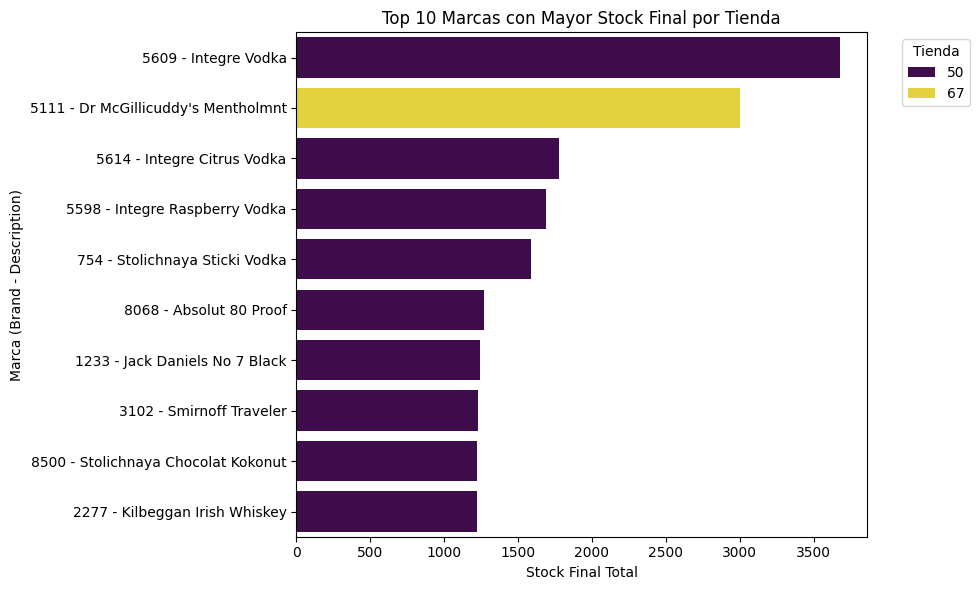

In [40]:
# Crear una nueva columna que combine 'Brand' y 'Description' en top_end_stock
top_end_stock['Marca Completa'] = top_end_stock['Brand'].astype(str) + " - " + top_end_stock['Description']

# Gráfico de barras horizontales para el top 10 de marcas con mayor stock por tienda
plt.figure(figsize=(10, 6))
sns.barplot(x='Stock Final Total', y='Marca Completa', hue='Store', data=top_end_stock, palette='viridis')

# Título y etiquetas
plt.title('Top 10 Marcas con Mayor Stock Final por Tienda')
plt.xlabel('Stock Final Total')
plt.ylabel('Marca (Brand - Description)')

# Ajustar la leyenda
plt.legend(title='Tienda', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el layout para evitar recortes
plt.show()


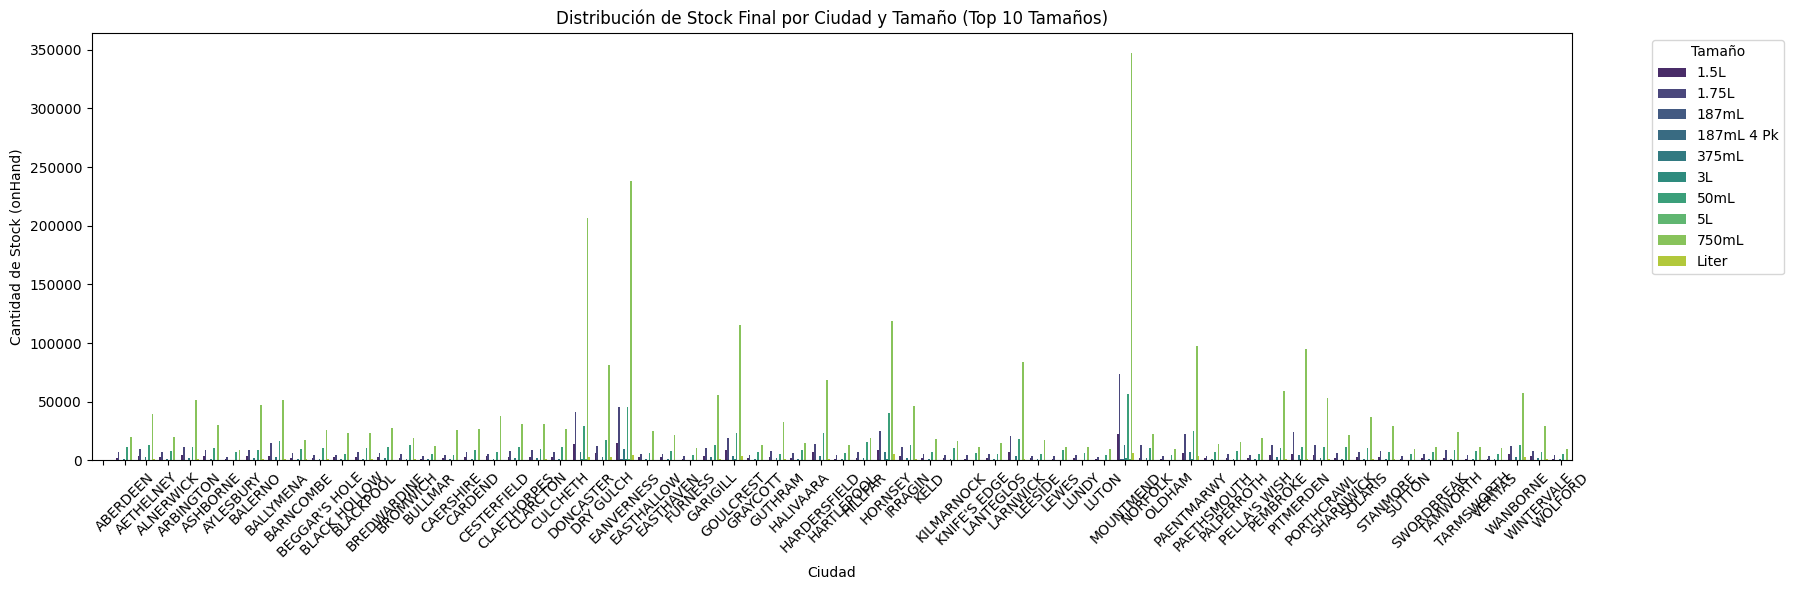

In [41]:
# Calcular el stock total por tamaño en el DataFrame original
stock_por_tamano2 = df_InventarioFinal.groupby('Size')['onHand'].sum().reset_index()

# Seleccionar los 10 tamaños con mayor stock total
top_tamanos2 = stock_por_tamano2.sort_values(by='onHand', ascending=False).head(10)

# Filtrar el DataFrame original para obtener solo las filas correspondientes a los top 10 tamaños
df_top_tamanos2 = df_InventarioFinal[df_InventarioFinal['Size'].isin(top_tamanos2['Size'])]

# Agrupar por 'City' y 'Size', y sumar el stock
stock_por_ciudad_y_tamano2 = df_top_tamanos2.groupby(['City', 'Size'])['onHand'].sum().reset_index()

# Crear la nueva columna que combine 'Size' para mejor visualización
stock_por_ciudad_y_tamano2['Tamaño Completo'] = stock_por_ciudad_y_tamano2['Size'].astype(str)

# Crear el gráfico de barras apiladas
plt.figure(figsize=(18, 6))
sns.barplot(x='City', y='onHand', hue='Tamaño Completo', data=stock_por_ciudad_y_tamano2, palette='viridis')

# Etiquetas y título
plt.title('Distribución de Stock Final por Ciudad y Tamaño (Top 10 Tamaños)')
plt.xlabel('Ciudad')
plt.ylabel('Cantidad de Stock (onHand)')
plt.xticks(rotation=45)  # Rotar las etiquetas para mejor legibilidad

# Ajustar la leyenda
plt.legend(title='Tamaño', bbox_to_anchor=(1.05, 1), loc='upper left')  # Ajustar la leyenda
plt.tight_layout()  # Ajustar el layout para evitar recortes

# Mostrar el gráfico
plt.show()
